# 0. Problem Statement

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC).

The data set contains the following diseases:

- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion

#### Importing all the important libraries

In [3]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pathlib
import os
import glob
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf #type: ignore
from tensorflow.keras import layers #type: ignore
from tensorflow.keras.models import Sequential #type: ignore
from tensorflow.keras.utils import image_dataset_from_directory #type: ignore
from tensorflow.keras.regularizers import l2 #type: ignore

# 1.Data Reading/Data Understanding

This project uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# defining the path for train and test dataset
data_dir_train = pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [4]:
# checking the train dataset
images_train = list(data_dir_train.glob('*/*.jpg'))
images_train[:5]

[PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0032014.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0031286.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0027303.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0030280.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0028816.jpg')]

In [5]:
# checking the test dataset
images_test = list(data_dir_test.glob('*/*.jpg'))
images_test[:5]

[PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Test/squamous cell carcinoma/ISIC_0024579.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Test/squamous cell carcinoma/ISIC_0024522.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Test/squamous cell carcinoma/ISIC_0024450.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Test/squamous cell carcinoma/ISIC_0024463.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Test/squamous cell carcinoma/ISIC_0011750.jpg')]

In [6]:
# count the number of images in the train and test dataset
image_count_train = len(images_train)
print(f"count of training images: {image_count_train}")
image_count_test = len(images_test)
print(f"count of test images: {image_count_test}")
print(f"Total count of images: {image_count_train+image_count_test}")

count of training images: 2239
count of test images: 118
Total count of images: 2357


All image paths are defined as expected

# 2. Dataset Creation

Loading the dataset using keras.preprocessing. 

Let's load these images off disk using the helpful image_dataset_from_directory utility.

Creating train & validation dataset from the directory with a batch size of 32. Also, resizing images to 180*180.

In [8]:
# defining parameters for the function `image_dataset_from_directory` which is used to load the images from the directory
batch_size = 32
img_height = 180
img_width = 180

In [10]:
# creatig both train and test datasets
train_ds = image_dataset_from_directory(directory=data_dir_train, batch_size=batch_size, image_size=(img_height, img_width), seed=123)
val_ds = image_dataset_from_directory(directory=data_dir_test, batch_size=batch_size, image_size=(img_height, img_width), seed=123)

Found 2239 files belonging to 9 classes.
Found 118 files belonging to 9 classes.


In [11]:
# class names of the train dataset
class_names = train_ds.class_names
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [12]:
# class names of the test dataset
class_names = val_ds.class_names
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

same classes are present in both train and test directories

In [13]:
# number of classes
num_classes = len(class_names)
print(num_classes)

9


All classes and number of images are loaded corrrectly in the dataset.

# 3.Dataset visualisation

In [13]:
# checking the first batch details
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

### 3.1 Visualizing image samples(16) from first batch of 32 images

plotting the first 16 images from the batch of 32 images

2024-09-16 11:58:18.722310: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


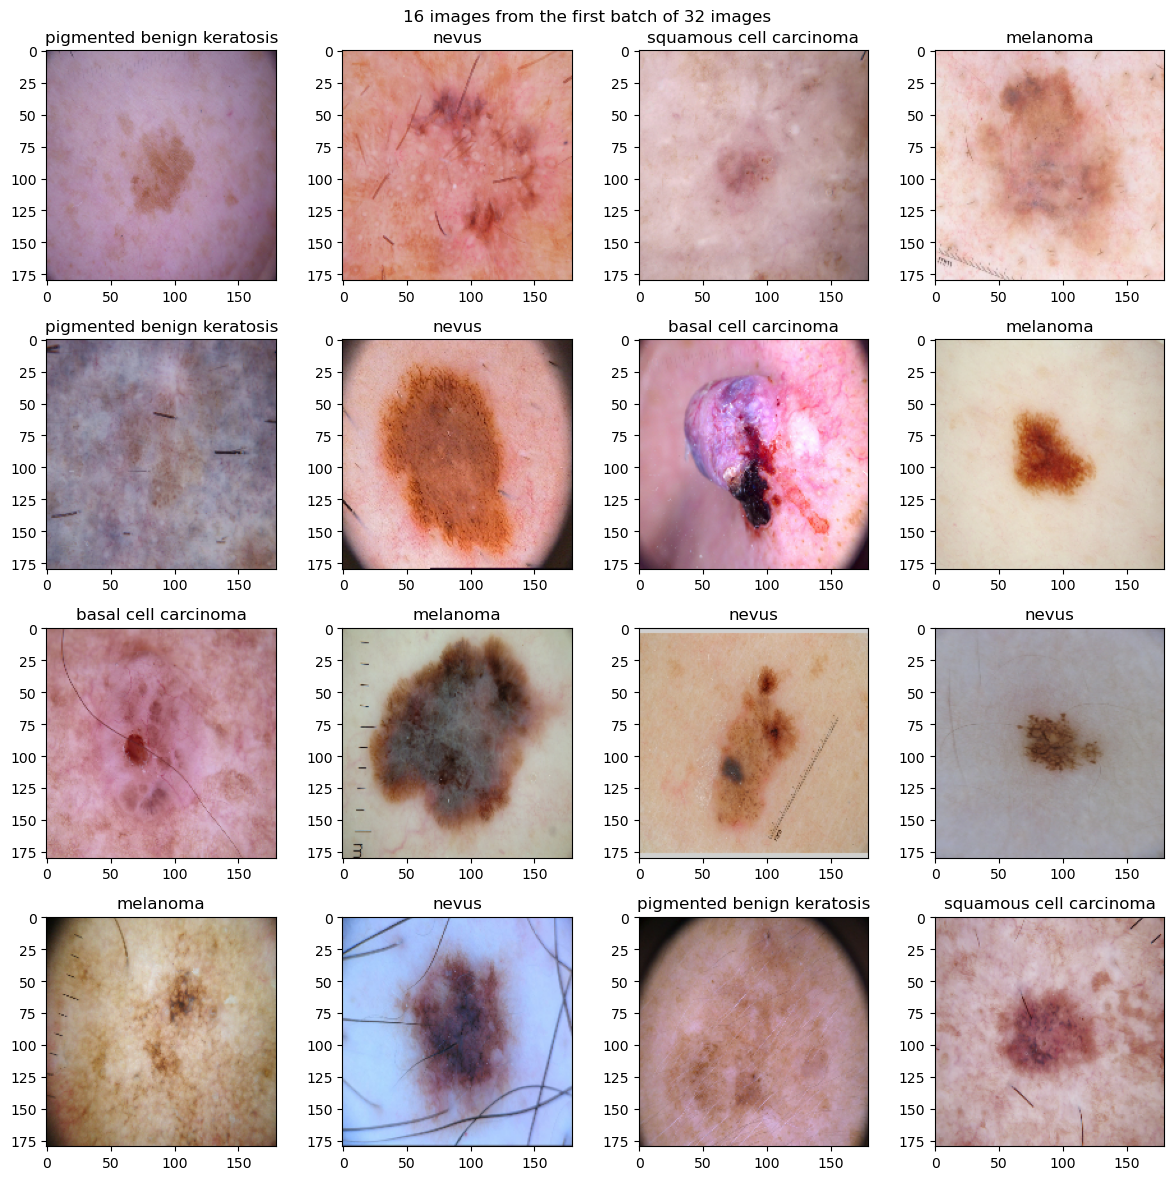

In [14]:
plt.figure(figsize=(12, 12))

for image_batch, labels_batch in train_ds:
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[labels_batch.numpy()[i]])
        
plt.suptitle('16 images from the first batch of 32 images')
plt.tight_layout()
plt.show()

#####  In the above plot, we can see that the images of all the 9 classes are `NOT` present from the dataset. Hence, we will re create the plot for checking atleast 1 image in each class.

But, we can see that all images are resized to 180 * 180 as required

### 3.2 Visualizing one image from each class

Creating code to visualize one instance of all the nine classes present in the dataset

2024-09-16 11:58:50.485636: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


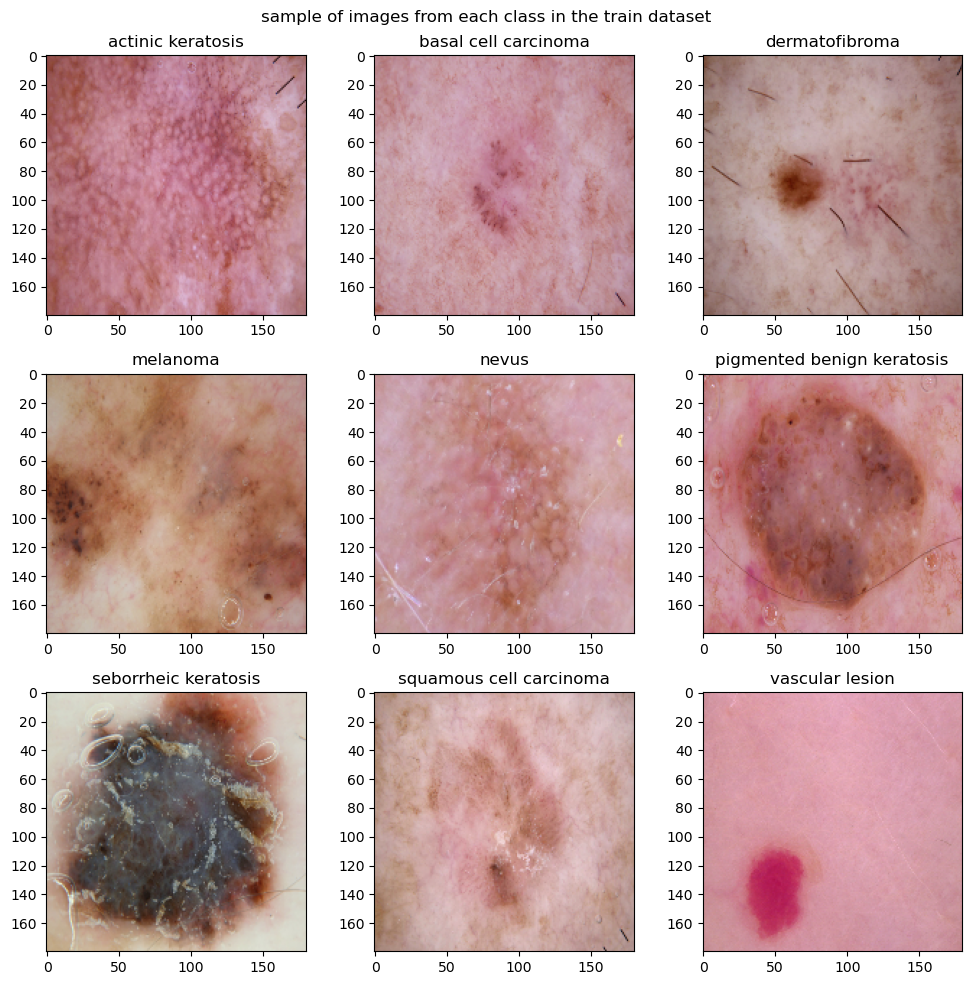

In [16]:
# looping through classnames and filtering dataset based on the class names and plotting them

plt.figure(figsize=(10, 10))

for i in range(len(class_names)):
   filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
   for image, label in filtered_ds.take(2):
       ax = plt.subplot(3, 3, i+1)
       plt.imshow(image[0].numpy().astype('uint8'))
       plt.title(class_names[label.numpy()[0]])

plt.suptitle('sample of images from each class in the train dataset')
plt.tight_layout()
plt.show()

In the above plot, we can see that the images of all the 9 classes

# 4. Configuring the dataset for performance

Using buffered prefetching, we can yield data from disk without having I/O become blocking.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [17]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 5.Model Building & training

Creating a CNN model, which can detect 9 classes present in the dataset

### 5.1 Normalizing the data
Using ```layers.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

Checking if normailziation works as expected. But, it will be part of model Sequential layer in final model building

In [18]:
# defining a function to plot the min and max pixel values
def image_pixel_min_max(dataset):
    image_batch, labels_batch = next(iter(dataset))
    first_image = image_batch[0]
    print(np.min(first_image), np.max(first_image))
    
# before normalization
print("Pixel values before normalization using rescaling layer")
image_pixel_min_max(train_ds)

# After normalization
# All values are divided by 255
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

print("Pixel values after normalization using rescaling layer")
image_pixel_min_max(normalized_ds)

Pixel values before normalization using rescaling layer
48.375008 191.49998
Pixel values after normalization using rescaling layer
0.021078492 0.9691176


Normalization layer converted data from `[0, 255]` to `[0, 1]`. It will be added as a layer in model definition

### 5.2 Creating the model

We will build a network with:
- Rescaling layer to normalize the pixel values to be in the `[0, 1]` range,
- Two convolutional layers having 32 filters with Relu activation followed by max pooling layer,
- Two convolutional layers having 64 filters with Relu activation followed by max pooling layer,
- Two convolutional layers having 128 filters with Relu activation followed by max pooling layer,
- and then `Flatten` the output of the pooling layer to give us a long vector, 
- then add a fully connected `Dense` layer with 512 neurons with `Relu` activation, and finally
- add a `softmax` layer with 9 (num_classes) neurons

In [19]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.Conv2D(32, (3,3), activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  
  layers.Conv2D(128, (3,3), padding='same', activation='relu'),
  layers.Conv2D(128, (3,3), activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

### 5.3 Compile the model

using `adam` optimizer and `sparse_categorical_crossentropy` as loss function with `accuracy` as metric

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 178, 178, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 89, 89, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 87, 87, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 43, 43, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 41, 41, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,506,537 (101.11 MB)

 Trainable params: 26,506,537 (101.11 MB)

 Non-trainable params: 0 (0.00 B)

> Total number of trainable paramaters in the model: 26 million

### 5.4 Train the model

training the model with 20 epochs

In [21]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


I0000 00:00:1726468272.718585    3291 service.cc:146] XLA service 0x7f20600100f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726468272.718639    3291 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-09-16 12:01:12.776178: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-16 12:01:13.124314: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
E0000 00:00:1726468278.179883    3291 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1726468278.421756    3291 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


 1/70 ━━━━━━━━━━━━━━━━━━━━ 20:11 18s/step - accuracy: 0.0000e+00 - loss: 2.2187

I0000 00:00:1726468288.156648    3291 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


27/70 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.1756 - loss: 2.3152

E0000 00:00:1726468296.784913    3289 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1726468297.152962    3289 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1726468297.289941    3289 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2024-09-16 12:01:37.497480: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng4{k11=1} for conv (f32[31,64,89,89]{3,2,1,0}, u8[0]{0}) custom-call(f32[31,64,87,87]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_

70/70 ━━━━━━━━━━━━━━━━━━━━ 52s 494ms/step - accuracy: 0.1950 - loss: 2.1732 - val_accuracy: 0.1864 - val_loss: 2.2544
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 0.2932 - loss: 1.8805 - val_accuracy: 0.2542 - val_loss: 2.0775
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 0.4096 - loss: 1.6857 - val_accuracy: 0.3390 - val_loss: 2.3372
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 0.4364 - loss: 1.5630 - val_accuracy: 0.2542 - val_loss: 3.3969
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.4231 - loss: 1.5892 - val_accuracy: 0.3729 - val_loss: 2.0790
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.4946 - loss: 1.4527 - val_accuracy: 0.3644 - val_loss: 2.2705
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.5121 - loss: 1.3887 - val_accuracy: 0.3390 - val_loss: 2.3308
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.5044 - loss: 1.4180 - val_accuracy: 0.3220 - val

#### Accuracy from final epoch: 
- Traning accuracy: 0.8456 - loss: 0.4412
- Validation accuracy: 0.2712 - loss: 5.7919

### 5.5 Visualizing the results over epochs

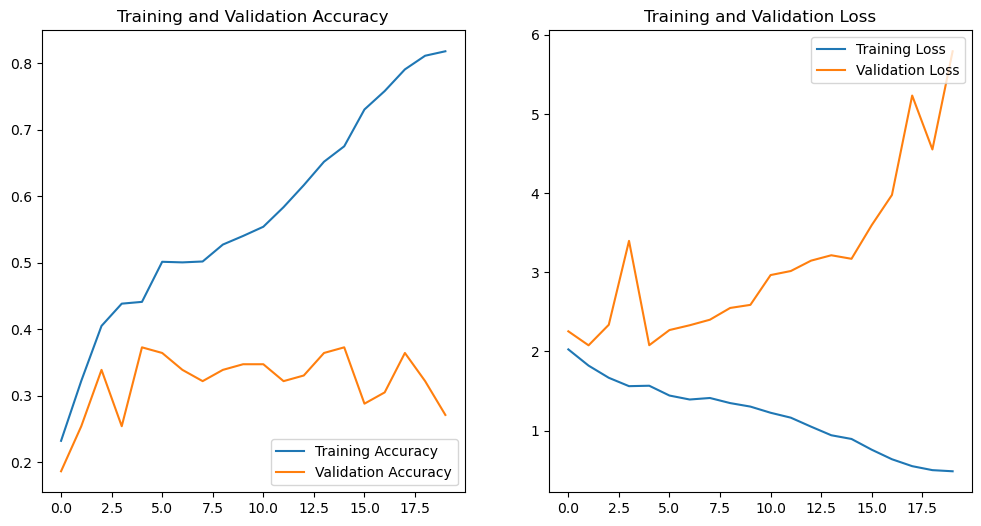

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 5.6 Obervations:

- The plots show that training accuracy (0.84) and validation accuracy (0.27) are off by large margins, and the model has achieved only around 27% accuracy on the validation set.
- Training accuracy is increasing with each Epoch, but validation accuracy is not increasing.
- Training loss is decreasing with each Epoch, but validation loss is increasing.
- The model is clearly `overfitting` on the training data and not performing well on the validation data.

# 6. Data Augmentation to resolve overfitting

There are multiple ways to reduce overfitting in the training process. 

When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples. 

> Data augmentation takes the approach of generating additional training data from existing examples by augmenting them using random transformations that generates additional images. This helps the model to learn more aspects of the data and generalize better.

#### using utilitites form keras module for data augmentation

In [31]:
# we will flip the image both horizontally and vertically as image can be in any orienetation.
# we will also add random rotation and zooming to the image.

data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

#### visualize how our augmentation strategy works for few instances of training image.

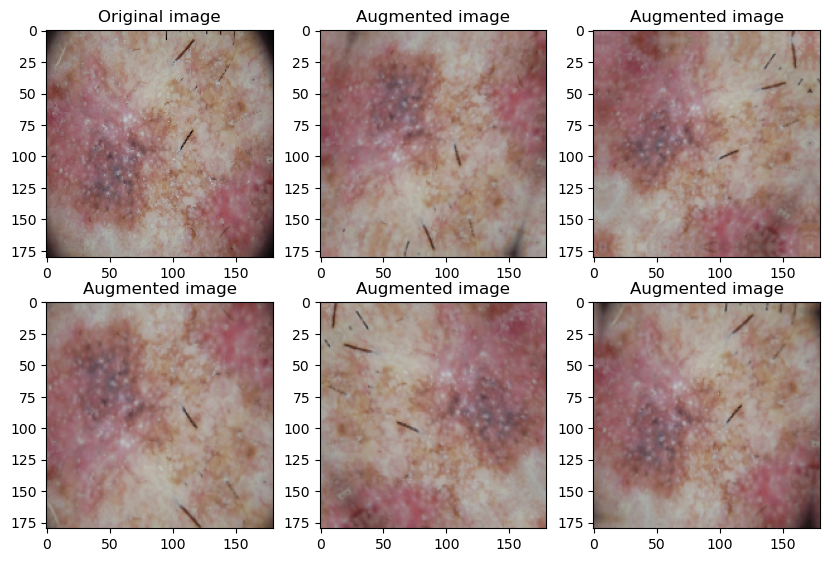

In [32]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds:
  ax = plt.subplot(3, 3, 1)
  plt.imshow(images[0].numpy().astype("uint8"))
  plt.title("Original image")
  for i in range(1,6):
    augmented_images = data_augmentation(images[0])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images.numpy().astype("uint8"))
    plt.title("Augmented image")
  break

> #### In above plot first image is original and remaining 5 are augmented images. As required, augumentation is able to generate more training data with similar-looking images.

### 6.1 creating the model, compile and train after data augumentation using keras utilities

creating the model

- Adding the batch normalization after each convolution layer
- Adding drop out layer after the last convolutional layer and fully connected layer.
- Also, added L2 regulization to fully connected layer to reduce overfitting further.

In [33]:
# data augumentation with input layer
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# building model with data augumentation
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(32, (3,3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  
  layers.Conv2D(128, (3,3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(128, (3,3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  
  layers.Flatten(),
  layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
  layers.Dropout(0.5),
  
  layers.Dense(num_classes, activation='softmax')
])

compiling the model

In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 180, 180, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 178, 178, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 89, 89, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 89, 89, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 87, 87, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 87, 87, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 43, 43, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 43, 43, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 41, 41, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 41, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         4,61

 Total params: 26,508,329 (101.12 MB)

 Trainable params: 26,507,433 (101.12 MB)

 Non-trainable params: 896 (3.50 KB)

training the model

In [35]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


2024-09-16 12:16:44.445718: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_3_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
W0000 00:00:1726469205.512147    3290 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469205.529438    3290 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469205.532768    3290 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469205.536499    3290 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469205.540191    3290 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469205.545041    3290 gpu_timer.cc:114] Skipping the delay kernel, measurement

 1/70 ━━━━━━━━━━━━━━━━━━━━ 11:25 10s/step - accuracy: 0.0312 - loss: 14.7264

W0000 00:00:1726469209.638112    3290 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469209.673036    3290 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469209.678281    3290 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469209.683397    3290 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469209.694213    3290 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469209.699756    3290 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469209.705846    3290 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469209.720852    3290 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469209.729314    3290 gp

20/70 ━━━━━━━━━━━━━━━━━━━━ 15s 315ms/step - accuracy: 0.1927 - loss: 35.5093

W0000 00:00:1726469215.784639    3287 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469215.787398    3287 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469215.790238    3287 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469215.794130    3287 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469215.797140    3287 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469215.800938    3287 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469215.805081    3287 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469215.809682    3287 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469215.813826    3287 gp

21/70 ━━━━━━━━━━━━━━━━━━━━ 23s 481ms/step - accuracy: 0.1946 - loss: 35.6965

W0000 00:00:1726469219.222851    3291 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469219.260663    3291 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469219.265663    3291 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469219.271590    3291 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469219.282622    3291 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469219.288609    3291 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469219.295479    3291 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469219.310310    3291 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469219.318566    3291 gp

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.2526 - loss: 37.1847

W0000 00:00:1726469235.727284    3286 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469235.729842    3286 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469235.732172    3286 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469235.734673    3286 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469235.737530    3286 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469235.740847    3286 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469235.744857    3286 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469235.748419    3286 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469235.751991    3286 gp

70/70 ━━━━━━━━━━━━━━━━━━━━ 37s 390ms/step - accuracy: 0.2533 - loss: 37.1662 - val_accuracy: 0.1441 - val_loss: 31.3400
Epoch 2/20


W0000 00:00:1726469236.545985    3286 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469236.551712    3286 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469236.557371    3286 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469236.563803    3286 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469236.569979    3286 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469236.576681    3286 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469236.583376    3286 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469236.590487    3286 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726469236.597627    3286 gp

70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 315ms/step - accuracy: 0.3228 - loss: 27.5058 - val_accuracy: 0.1356 - val_loss: 59.8239
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 320ms/step - accuracy: 0.2883 - loss: 18.7240 - val_accuracy: 0.1356 - val_loss: 39.3776
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 315ms/step - accuracy: 0.3159 - loss: 12.8662 - val_accuracy: 0.1441 - val_loss: 33.0848
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 319ms/step - accuracy: 0.3590 - loss: 8.6353 - val_accuracy: 0.1525 - val_loss: 15.4167
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 319ms/step - accuracy: 0.3716 - loss: 5.9536 - val_accuracy: 0.2203 - val_loss: 8.4727
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 23s 330ms/step - accuracy: 0.3635 - loss: 4.4127 - val_accuracy: 0.2373 - val_loss: 4.5642
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 321ms/step - accuracy: 0.3946 - loss: 3.4960 - val_accuracy: 0.2712 - val_loss: 3.5001
Epoch 9/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 23s 325ms/step - accuracy: 0.4298 - loss: 2.9105 - val_accuracy

#### Accuracy after augumentation: 
- Traning accuracy: 0.4452 - loss: 1.9700
- Validation accuracy: 0.3559 - loss: 2.8219

checking the accuracy and loss after augumentation over epochs

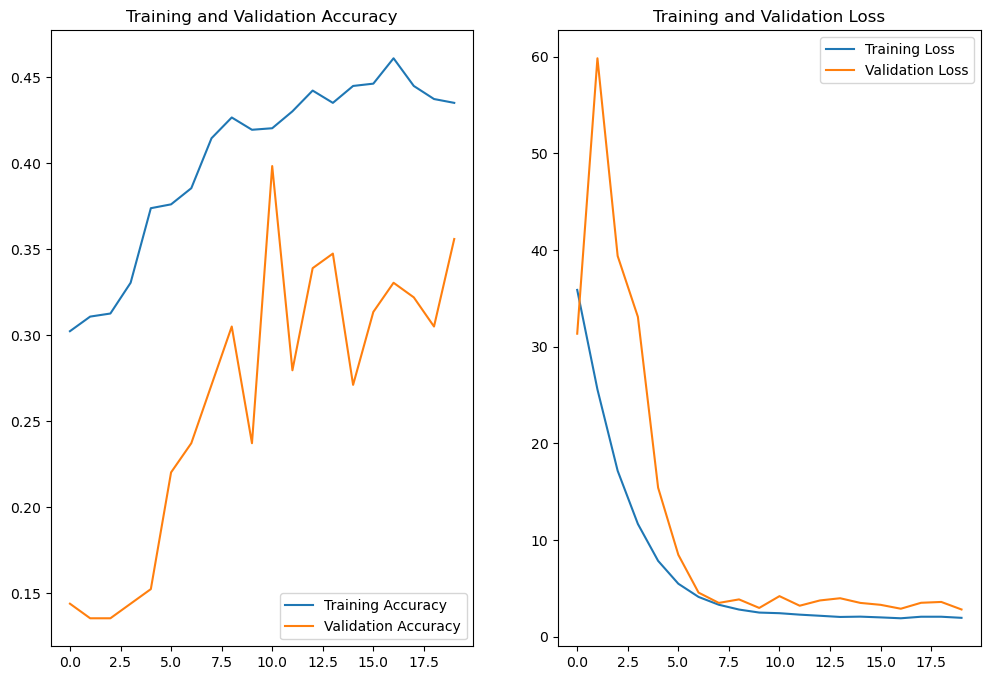

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 6.2 Obervations after augumentation:

- Validation accuracy is increasing along with Training accuracy. In previous model, validation accuracy was constant.
- Validation loss is also reducing when Training loss is decreasing with each Epoch. In previos model, validation loss was increasing.
- Augumentation, batch normalization, L2 regularization and dropout helped to `reduce overfitting` comapred to previous default model. 
- But, accuracy on training data is low. Hence, It may be `underfitting` on training data. More data may help in underfitting issue

# 7. Checking Class Distribution of Training Dataset

#### Finding the distribution of classes in the training dataset to identify any imbalance in classes.
**Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [14]:
# reload data as previously created datasets converted into different formats
train_ds = image_dataset_from_directory(directory=data_dir_train, batch_size=batch_size, image_size=(img_height, img_width), seed=123)
val_ds = image_dataset_from_directory(directory=data_dir_test, batch_size=batch_size, image_size=(img_height, img_width), seed=123)

Found 2239 files belonging to 9 classes.
Found 118 files belonging to 9 classes.


In [15]:
# extract & concatenate all labels in train dataset
labels =  np.array([])
for img_batch, label_batch in train_ds:
    labels = np.concatenate([labels, label_batch])

print(len(labels))

2239


2024-09-16 13:07:35.096564: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [16]:
# create dataframe with count of each class
class_count = pd.DataFrame(np.unique(labels, return_counts=True)).T
class_count.columns = ['class', 'count']
class_count['class_names'] = class_count['class'].apply(lambda x: class_names[int(x)])
class_count

class  count                 class_names
0    0.0  114.0           actinic keratosis
1    1.0  376.0        basal cell carcinoma
2    2.0   95.0              dermatofibroma
3    3.0  438.0                    melanoma
4    4.0  357.0                       nevus
5    5.0  462.0  pigmented benign keratosis
6    6.0   77.0        seborrheic keratosis
7    7.0  181.0     squamous cell carcinoma
8    8.0  139.0             vascular lesion

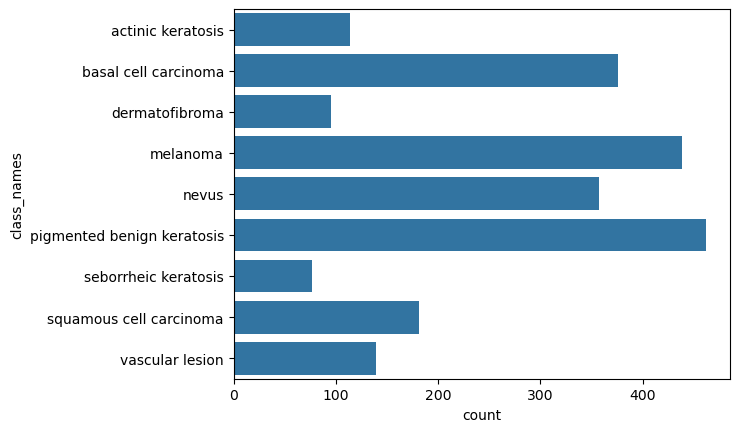

In [17]:
# plotting the class distribution
sns.barplot(x='count', y='class_names', data=class_count)
plt.show()

##### - `seborrheic keratosis` class has the least number of samples.
##### - `pigmented benign keratosis`, `melanoma` classes dominate the data in terms of proportionate number of samples

#### Pie chart for class distribution visualization

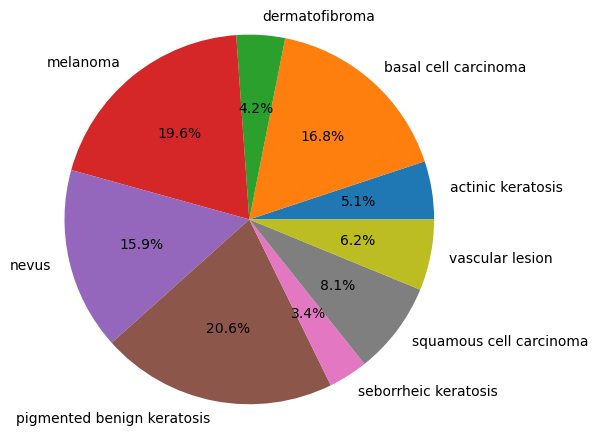

In [18]:
plt.figure(figsize=(4, 4))
plt.pie(x=class_count['count'], labels=class_count['class_names'], autopct='%1.1f%%', radius=1.5) #type: ignore
plt.show()

> #### Class imbalnce is present in the dataset, Appropriate augmentation techniques are needed to handle class imbalance

# 8. Handling class imbalances

Using a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [19]:
path_to_training_dataset=data_dir_train
import Augmentor # type:ignore
for i in class_names:
    p = Augmentor.Pipeline(pathlib.Path.joinpath(path_to_training_dataset,i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10) # 10 degree rotation
    # p.zoom(probability=0.4, min_factor=1.0, max_factor=1.1) # zoom in
    # p.flip_random(probability=0.5) # random horizontal or vertical flip
    p.sample(500) ## We are adding 1000 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB007DE6750>: 100%|██████████| 500/500 [00:03<00:00, 155.23 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB007DECEC0>: 100%|██████████| 500/500 [00:03<00:00, 160.06 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB007D349E0>: 100%|██████████| 500/500 [00:03<00:00, 157.11 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7FB007D2C8C0>: 100%|██████████| 500/500 [00:11<00:00, 43.90 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FAF68729640>: 100%|██████████| 500/500 [00:10<00:00, 46.03 Samples/s] 


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FB007DD4E00>: 100%|██████████| 500/500 [00:03<00:00, 145.19 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FB007DE7530>: 100%|██████████| 500/500 [00:06<00:00, 82.89 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB007DD07A0>: 100%|██████████| 500/500 [00:03<00:00, 151.54 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB007DE5340>: 100%|██████████| 500/500 [00:03<00:00, 152.43 Samples/s]                  


> Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types. Lets take a look at total count of augmented images.

In [20]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


> #### 9 classes with 500 images each have been created.

#### the distribution of augmented data after adding new images to the original training data.

In [21]:
# Loading the augmented images into dataframe and finding their classes
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in path_list]
dataframe_dict_new = dict(zip(path_list, lesion_list_new))
augemented = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','class_names'])
augemented

Path  \
0     Skin cancer ISIC The International Skin Imagin...   
1     Skin cancer ISIC The International Skin Imagin...   
2     Skin cancer ISIC The International Skin Imagin...   
3     Skin cancer ISIC The International Skin Imagin...   
4     Skin cancer ISIC The International Skin Imagin...   
...                                                 ...   
4495  Skin cancer ISIC The International Skin Imagin...   
4496  Skin cancer ISIC The International Skin Imagin...   
4497  Skin cancer ISIC The International Skin Imagin...   
4498  Skin cancer ISIC The International Skin Imagin...   
4499  Skin cancer ISIC The International Skin Imagin...   

                     class_names  
0        squamous cell carcinoma  
1        squamous cell carcinoma  
2        squamous cell carcinoma  
3        squamous cell carcinoma  
4        squamous cell carcinoma  
...                          ...  
4495  pigmented benign keratosis  
4496  pigmented benign keratosis  
4497  pigmented benign keratosis  
4498  pigmented benign keratosis  
4499  pigmented benign keratosis  

[4500 rows x 2 columns]

creating grouped dataframe with count of each class after augmentation

In [22]:
augumented_count = augemented.groupby(augemented['class_names']).count().reset_index()
total_df = pd.merge(left=class_count, right=augumented_count, on='class_names', how='left')
total_df['total_files'] = total_df['count'] + total_df['Path']
total_df

class  count                 class_names  Path  total_files
0    0.0  114.0           actinic keratosis   500        614.0
1    1.0  376.0        basal cell carcinoma   500        876.0
2    2.0   95.0              dermatofibroma   500        595.0
3    3.0  438.0                    melanoma   500        938.0
4    4.0  357.0                       nevus   500        857.0
5    5.0  462.0  pigmented benign keratosis   500        962.0
6    6.0   77.0        seborrheic keratosis   500        577.0
7    7.0  181.0     squamous cell carcinoma   500        681.0
8    8.0  139.0             vascular lesion   500        639.0

plotting the class distribution with proportion

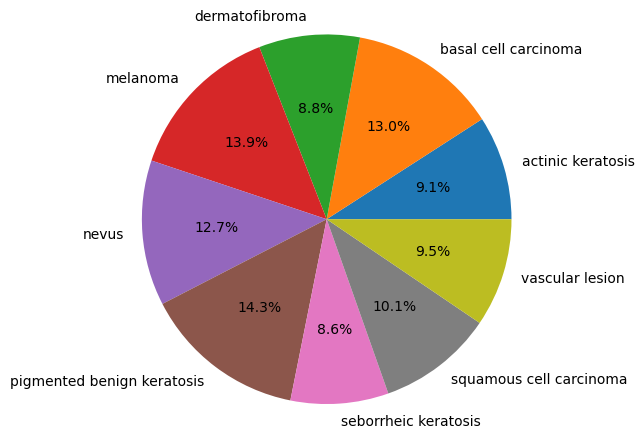

In [23]:
plt.figure(figsize=(4, 4))
plt.pie(x=total_df['total_files'], labels=total_df['class_names'], autopct='%1.1f%%', radius=1.5) #type: ignore
plt.show()

> #### we have increased number of samples through augmentation in low count classes. Now, the class balance is imrproved. 

# 9.creating new train and validation datasets from augmented dataset

In [113]:
# parameters for the function `image_dataset_from_directory` which is used to load the images from the directory
batch_size = 32
img_height = 180
img_width = 180

creating training set from augmented train dataset

In [114]:
train_ds = image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


creating test set from augmented train dataset

In [115]:
val_ds = image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [116]:
# number of classes
num_classes = len(train_ds.class_names)
print(num_classes)

9


In [28]:
# prefetching the dataset
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 10.Model Building & training on the rectified class imbalance data

### 10.1 creating the model, compile and train

creating the model (same as the previous model which used with keras data augumentation)

In [29]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(32, (3,3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  
  layers.Conv2D(128, (3,3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(128, (3,3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  
  layers.Flatten(),
  layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
  layers.Dropout(0.5),
  
  layers.Dense(num_classes, activation='softmax')
])

compiling the model

In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 180, 180, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 178, 178, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 89, 89, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 89, 89, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 87, 87, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 87, 87, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 43, 43, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 43, 43, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 41, 41, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 41, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,508,329 (101.12 MB)

 Trainable params: 26,507,433 (101.12 MB)

 Non-trainable params: 896 (3.50 KB)

training the model for 30 epochs

In [32]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


I0000 00:00:1726472408.081015   13779 service.cc:146] XLA service 0x7faf2c01bd00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726472408.081100   13779 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-09-16 13:10:08.209961: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-16 13:10:09.001473: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
E0000 00:00:1726472415.235544   13779 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1726472415.373602   13779 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


165/169 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.2260 - loss: 29.4805

E0000 00:00:1726472456.163462   13780 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1726472456.395748   13780 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1726472457.118191   13780 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1726472457.346625   13780 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1726472458.817710   13780 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2024-

169/169 ━━━━━━━━━━━━━━━━━━━━ 78s 293ms/step - accuracy: 0.2262 - loss: 29.2972 - val_accuracy: 0.1403 - val_loss: 32.9912
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 24s 144ms/step - accuracy: 0.2790 - loss: 10.3016 - val_accuracy: 0.1693 - val_loss: 12.8653
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 25s 146ms/step - accuracy: 0.3231 - loss: 4.1783 - val_accuracy: 0.3660 - val_loss: 3.3547
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 25s 146ms/step - accuracy: 0.3324 - loss: 2.6773 - val_accuracy: 0.3630 - val_loss: 2.5710
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 25s 145ms/step - accuracy: 0.3424 - loss: 2.6514 - val_accuracy: 0.1730 - val_loss: 10.0146
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 25s 146ms/step - accuracy: 0.3850 - loss: 2.2879 - val_accuracy: 0.3296 - val_loss: 2.6167
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 25s 146ms/step - accuracy: 0.3623 - loss: 2.6237 - val_accuracy: 0.5026 - val_loss: 1.9023
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 25s 145ms/step - accuracy: 0.4012 - loss: 1.9780 

#### Accuracy  after augumentation from final epoch: 
- Traning accuracy: 0.8372 - loss: 2.0004
- Validation accuracy: 0.7387 - loss: 2.4022

checking the accuracy and loss after augumentation over epochs

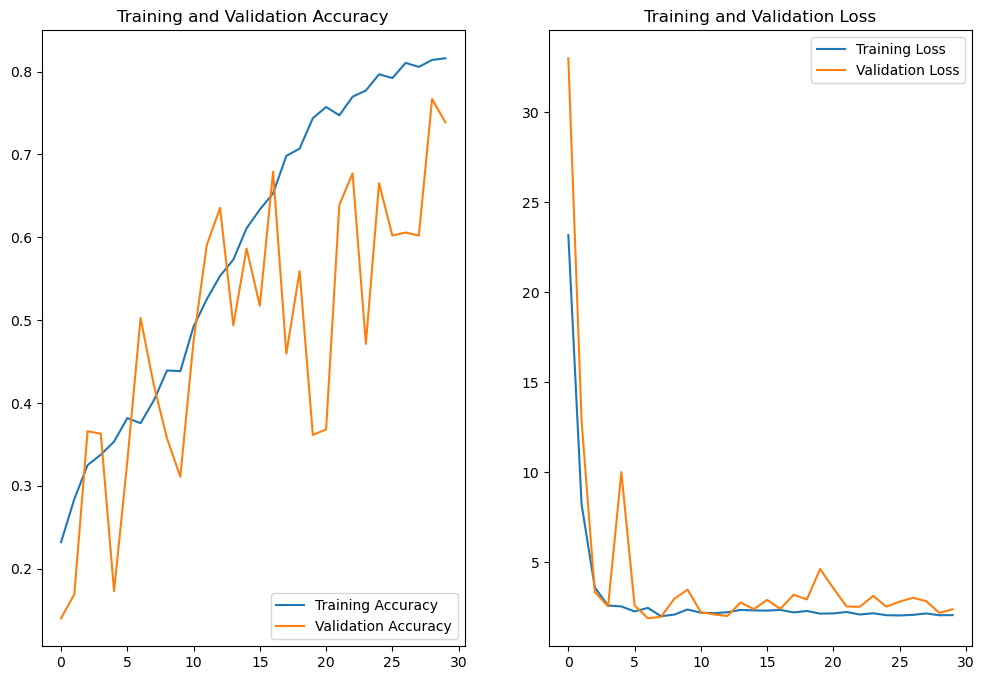

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
# saving the model for future use
model.save("model_with_Augmentor.keras")

### 9.2 Obervations after rectifying class imbalance:

- Validation accuracy is increasing along with Training accuracy. Much better than previous models.
- Validation loss is decreasing/constant along with Training loss. Much better than previous models.
- Augumentation for class imbalance helped to `reduce overfitting`, but there is still some gap between training and validation accuracy. 
- But, it increased accuracy on validation data as well along with training data. Hence, Underfitting observed in previous model is also resolved.

# 11. Verifying on True test data set from folder

Loading the model

In [8]:
# Loading the saved model
model = tf.keras.models.load_model("model_with_Augmentor.keras") # type:ignore

# model summary
model.summary() #type:ignore

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 180, 180, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 178, 178, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 89, 89, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 89, 89, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 87, 87, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 87, 87, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 43, 43, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 43, 43, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 41, 41, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 41, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,523,197 (303.36 MB)

 Trainable params: 26,507,433 (101.12 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 53,014,868 (202.24 MB)

Geeting the accuracy on test set

In [101]:
# defining parameters for the function `image_dataset_from_directory` which is used to load the images from the directory
batch_size = 32
img_height = 180
img_width = 180

# loading test dataset from directory for verification
test_ds = image_dataset_from_directory(directory=data_dir_test, batch_size=batch_size, image_size=(img_height, img_width), seed=123)

# evaluate the model on the test dataset
model.evaluate(test_ds) #type: ignore

Found 118 files belonging to 9 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.4448 - loss: 3.9419


[3.9891295433044434, 0.43220338225364685]

> ##### Accuracy of final model on Test data is 0.43 which is better than previous model (0.35)  

#### verifying the predictions visually for 1 sample of each class of Test set

In [96]:
#class names
class_names = test_ds.class_names
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


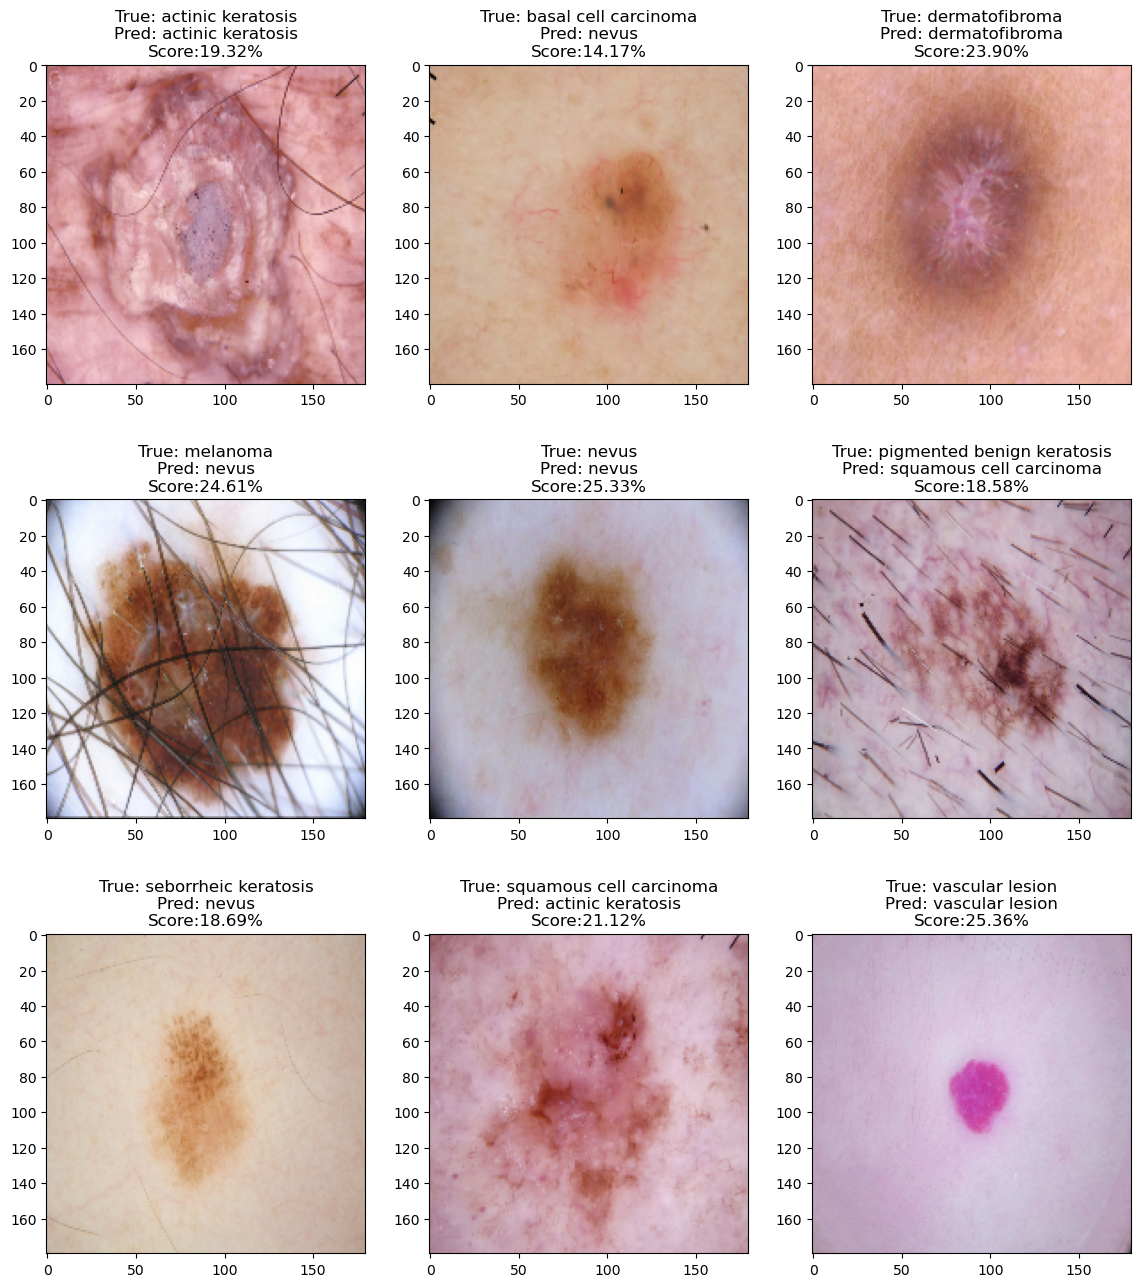

In [144]:
plt.figure(figsize=(14, 16))

# loop through predictions
count = 0
for images, labels in test_ds:
    predictions = model.predict(images) #type:ignore
    if count < 9:
        for lab in labels:
            if int(lab) == count:
                pos = np.where(labels.numpy() == int(lab))[0][0]
                score = tf.nn.softmax(predictions[pos])
                ax = plt.subplot(3, 3, count+1)
                plt.imshow(images[pos].numpy().astype('uint8'))
                plt.title(f"True: {class_names[count]}\nPred: {class_names[np.argmax(score)]}\nScore:{100 * np.max(score):.2f}%")
                
                count = count+1

# 11. Summary 

In this project, CNN model is bulit with several combinations. varying the netowrk structure, layers, batch normlaization, drop out position and values, L2 regularization. 
Accuracy improvements with final network structure are summarized below.

Network structure
- Rescaling layer to normalize the pixel values to be in the `[0, 1]` range,
- Two convolutional layers having 32 filters with Relu activation followed by max pooling layer,
- Two convolutional layers having 64 filters with Relu activation followed by max pooling layer,
- Two convolutional layers having 128 filters with Relu activation followed by max pooling layer,
- and then `Flatten` the output of the pooling layer to give us a long vector, 
- then add a fully connected `Dense` layer with 512 neurons with `Relu` activation, and finally
- a `softmax` layer with 9 (num_classes) neurons



> #### First model: First model: Baseline model with above structure
- Training accuracy: 0.8456 - loss: 0.4412
- Validation (Test) accuracy: 0.2712 - loss: 5.7919
- `Overfitting` is observed


> #### Second model: Data augumentation using keras utilities, batch normalization after every convolution layer, dropout after final convolution layer & fully connected layer, regularization in fully connected layer
- Training accuracy: 0.4452 - loss: 1.9700
- Validation (Test) accuracy: 0.3559 - loss: 2.8219
- `Overfitting` is resolved, but `underfitting` is observed on train set


> #### Third model: Data augumentation with Augumentor library to handle class imbalance. But, network architecture is same as second model. 
- Training accuracy: 0.8372 - loss: 2.0004
- Validation (created from augumented data) accuracy: 0.7387 - loss: 2.4022
- Test accuracy: 0.43 - loss: 3.98
- Good accuracy on train and validaiton set, but not very good on test set. However, we can see that, this approach helped to handle both overfitting and underfitting issues upto certain extent. 

In [8]:
pd.DataFrame([
    [0.84, "-", 0.27, "first model"],
    [0.44, "-", 0.35, "second model"],
    [0.83, 0.73, 0.43, "third model"]],
    columns=['Train Accuarcy', 'Validation Accuracy', 'Test Accuracy', 'model'])

Train Accuarcy Validation Accuracy  Test Accuracy         model
0            0.84                   -           0.27   first model
1            0.44                   -           0.35  second model
2            0.83                0.73           0.43   third model

> ### Test set Accuracy increased from 27% to 43% with data augumation, class balance, batch normalizaiton, dropout & regularization.


# The END